# **EYE INFECTION DATASET (STAGE-1)**






## **DATA ACQUISITION**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ed=pd.read_csv('Eye_dataset.csv',on_bad_lines='skip') 
ed.head()


,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK
0,15863,46,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'
1,15863,46,MALE',15-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Satisfied '
2,15864,42,FEMALE',01-JUL-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Treatment Going On'
3,15864,42,FEMALE',10-AUG-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Satisfied '
4,15865,9,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On'


In [ ]:
ed.shape

(835, 9)

In [ ]:
ed['LB']=ed['STR']

In [ ]:
ed['LB'].replace(["Navanac Eye Drop'" , "Anti-Glaucoma Medication'","Tab: AZM,Navanac Eye Drop'","Tab: Vitamin A'","Corneal Transplantation '"],1,inplace=True)

In [ ]:
ed['LB'].replace(["Vitractomy Surgery'" , "Repair  Surgery'","Yag Laser Peripherial Iridotomy'","Yag LaserCapsulotomy'","Anti-Glaucoma Medication'","Inj: Avastin,Navanac Eye Drop'","Neurological Surgery'","Inj: Avastin,Argon Laser'","Inj: Avastin ,'Navanac Eye Drop'","Inj: Avastin ,Navanac Eye Drop'","Laser Peripherial Iridotomy'","Argon Laser '","Trebyculectomy'","Inj: Avastin,Navanac Eye Drop' '","Inj: Avastin,Argon Laser '","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''","Inj: Avastin ,'Tab: AZM,Navanac Eye Drop',","Trebyculectomy,Anti-Glaucoma Medication'","Inj: Avastin '","Inj: Avastin '","Neurological Disorder'"],0,inplace=True)

In [ ]:

ed.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On',0
1,15863,46,MALE',15-AUG-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Satisfied ',0
2,15864,42,FEMALE',01-JUL-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Treatment Going On',0
3,15864,42,FEMALE',10-AUG-10',sudden loss of vision ',Vitrous Haemoriage',B-Scan',Vitractomy Surgery',Satisfied ',0
4,15865,9,MALE',01-JUL-10',sudden loss of vision ',Retinal Detetchment ',B-Scan',Repair Surgery',Treatment Going On',0


**DATA PREPROCESSING**

In [ ]:
ed=ed.replace('?', np.NaN)

In [ ]:
pd.isna(ed).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     1
LB      0
dtype: int64

In [ ]:
for column in ed.columns:
    if ed[column].dtype == 'object':
        ed[column].fillna(ed[column].mode()[0], inplace=True)

In [ ]:
pd.isna(ed).sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     0
LB      0
dtype: int64

<Axes: >

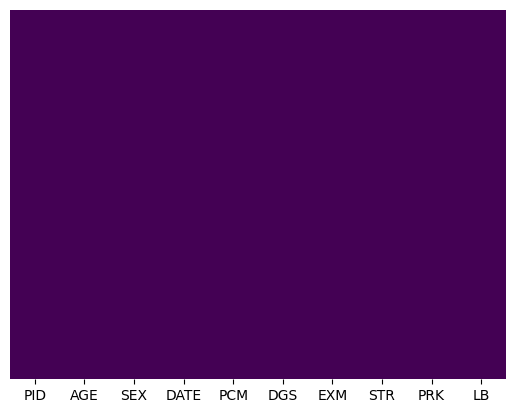

In [ ]:

sns.heatmap(ed.isnull(),yticklabels=False,cbar=False,cmap='viridis')


**DATA PREPERATION**

In [ ]:
ed['SEX'].value_counts() 

MALE'      493
FEMALE'    342
Name: SEX, dtype: int64

Text(0, 0.5, 'Count')

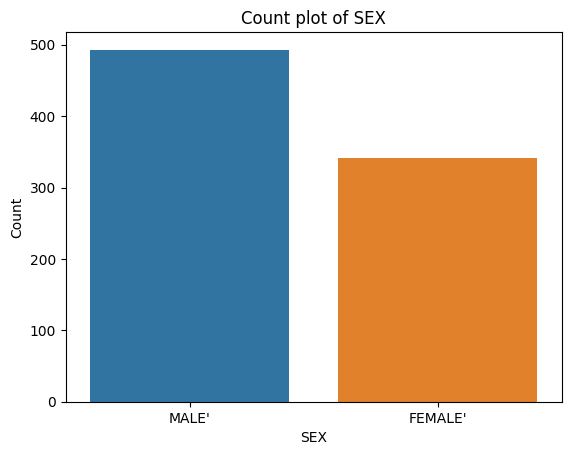

In [ ]:
sns.countplot(x=ed['SEX'])
plt.title('Count plot of SEX')
plt.xlabel('SEX')
plt.ylabel('Count')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = le.fit_transform(ed['SEX'])
ed['SEX']=df


In [ ]:
ed['DATE'].value_counts()

27-SEP-10'    23
20-JUL-10'    22
06-JUL-10'    19
30-SEP-10'    19
15-JUL-10'    18
              ..
27-JUL-10      1
07-DEC-10'     1
09-SEP-10'     1
09-SEP-10      1
2-AUG-10'      1
Name: DATE, Length: 146, dtype: int64

In [ ]:


df = le.fit_transform(ed['DATE'])
ed['DATE']=df

In [ ]:
ed['PCM'].value_counts()

Blured Vision '                         396
Raised Intra Occular Pressure '         149
sudden loss of vision '                 135
Decrease Vision '                        80
Loss Of Peripherial Field of Vision'     66
Decrease Vision in Both Eye'              9
Name: PCM, dtype: int64

In [ ]:
df = le.fit_transform(ed['PCM'])
ed['PCM']=df

In [ ]:
ed['DGS'].value_counts()

Vitrous Haemoriage'                  246
Retinal Detetchment '                180
Angle Occular Glacoma'               148
Postirior Capsular Opacification'     48
Glaucoma'                             45
Diabetic Retinopathy'                 39
CSCR'                                 25
CRVO'                                 22
Macular Oedema'                       21
Neurological Disorder'                21
Temporal Defect'                      16
Retinitis Pigmentosa '                14
Keretoconrus '                         9
Pigmentosa'                            1
Name: DGS, dtype: int64

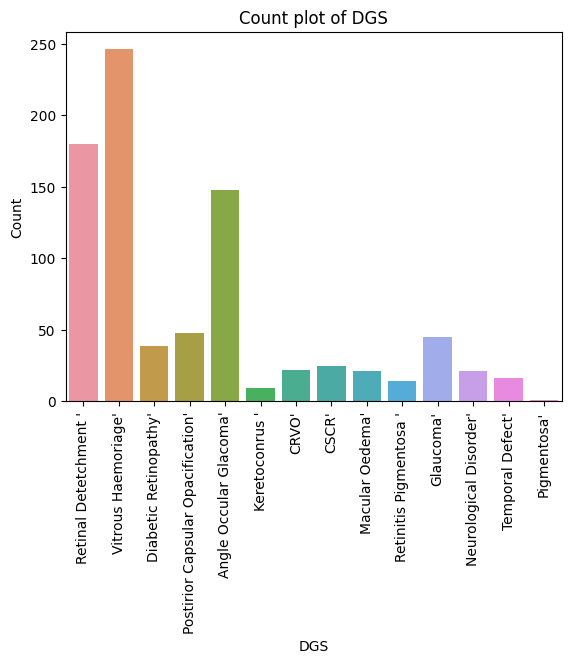

In [ ]:
sns.countplot(x=ed['DGS'])
plt.title('Count plot of DGS')
plt.xlabel('DGS')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = le.fit_transform(ed['DGS'])
ed['DGS']=df


In [ ]:

ed['EXM'].value_counts()

B-Scan'                427
Yag Laser'             192
FFA'                    68
Perimetry'              68
Argon Laser Grid'       29
Argon Laser  PRP'       21
Argon Laser BRVO'       21
Corneal Topography'      9
Name: EXM, dtype: int64

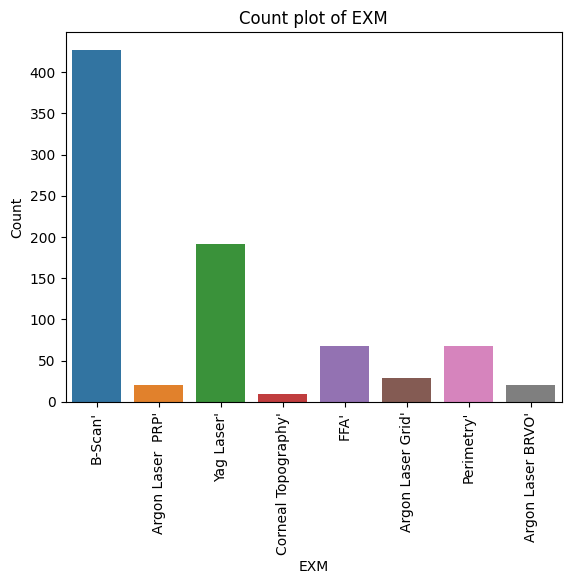

In [ ]:



sns.countplot(x=ed['EXM'])
plt.title('Count plot of EXM')
plt.xlabel('EXM')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:

df = le.fit_transform(ed['EXM'])
ed['EXM']=df


In [ ]:
ed['STR'].value_counts()

Vitractomy Surgery'                           254
Repair  Surgery'                              173
Yag Laser Peripherial Iridotomy'              145
Navanac Eye Drop'                              87
Yag LaserCapsulotomy'                          47
Anti-Glaucoma Medication'                      45
Neurological Surgery'                          18
Tab: AZM,Navanac Eye Drop'                     15
Tab: Vitamin A'                                15
Corneal Transplantation '                       9
Inj: Avastin,Navanac Eye Drop'                  8
Inj: Avastin,Argon Laser '                      3
Inj: Avastin ,'Navanac Eye Drop'                3
Inj: Avastin ,Navanac Eye Drop'                 2
Laser Peripherial Iridotomy'                    2
Argon Laser '                                   1
Trebyculectomy'                                 1
Inj: Avastin,Navanac Eye Drop' '                1
Inj: Avastin,Argon Laser'                       1
Inj: Avastin ,'Tab: AZM,Navanac Eye Drop''      1


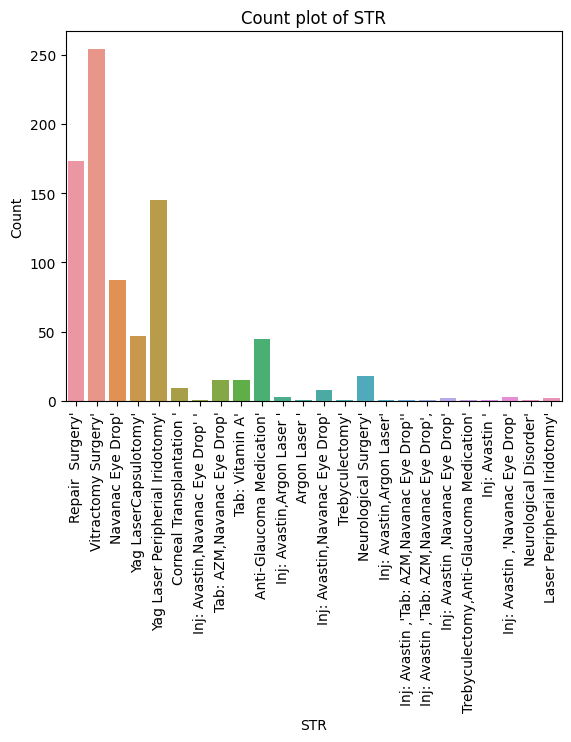

In [ ]:
sns.countplot(x=ed['STR'])
plt.title('Count plot of STR')
plt.xlabel('STR')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = le.fit_transform(ed['STR'])
ed['STR']=df


In [ ]:
ed['PRK'].value_counts()

Satisfied '                        426
Treatment Going On'                178
UnSatisfied '                      139
Leave Against Medical Advise'       84
Leave Against Medical Record  '      8
Name: PRK, dtype: int64

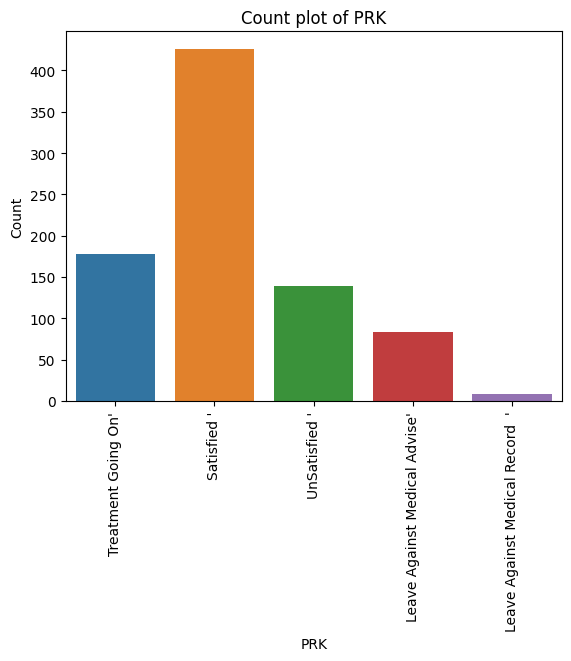

In [ ]:
sns.countplot(x=ed['PRK'])
plt.title('Count plot of PRK')
plt.xlabel('PRK')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:

df = le.fit_transform(ed['PRK'])
ed['PRK']=df


In [ ]:
ed.head()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
0,15863,46,1,1,5,10,3,16,3,0
1,15863,46,1,65,5,10,3,16,2,0
2,15864,42,0,1,5,13,3,21,3,0
3,15864,42,0,42,5,13,3,21,2,0
4,15865,9,1,1,5,10,3,16,3,0


In [ ]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PID     835 non-null    int64
 1   AGE     835 non-null    int64
 2   SEX     835 non-null    int64
 3   DATE    835 non-null    int64
 4   PCM     835 non-null    int64
 5   DGS     835 non-null    int64
 6   EXM     835 non-null    int64
 7   STR     835 non-null    int64
 8   PRK     835 non-null    int64
 9   LB      835 non-null    int64
dtypes: int64(10)
memory usage: 65.4 KB


In [ ]:
ed.dtypes

PID     int64
AGE     int64
SEX     int64
DATE    int64
PCM     int64
DGS     int64
EXM     int64
STR     int64
PRK     int64
LB      int64
dtype: object

In [ ]:
ed.describe()

,PID,AGE,SEX,DATE,PCM,DGS,EXM,STR,PRK,LB
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000
mean,16465.417964,44.676647,0.590419,76.504192,1.876647,7.749701,4.177246,17.435928,2.335329,0.20479
std,366.516398,20.023808,0.492051,41.704176,2.056835,4.967362,1.930994,5.808218,1.086271,0.40379
min,15863.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,16129.500000,30.000000,0.000000,42.000000,0.000000,3.000000,3.000000,16.000000,2.000000,0.00000
50%,16445.000000,50.000000,1.000000,77.000000,1.000000,10.000000,3.000000,21.000000,2.000000,0.00000
75%,16789.000000,60.000000,1.000000,111.000000,4.000000,13.000000,6.000000,21.000000,3.000000,0.00000
max,17113.000000,86.000000,1.000000,145.000000,5.000000,13.000000,7.000000,23.000000,4.000000,1.00000


**OUTLIER DETECTION AND REMOVAL**

In [ ]:
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']

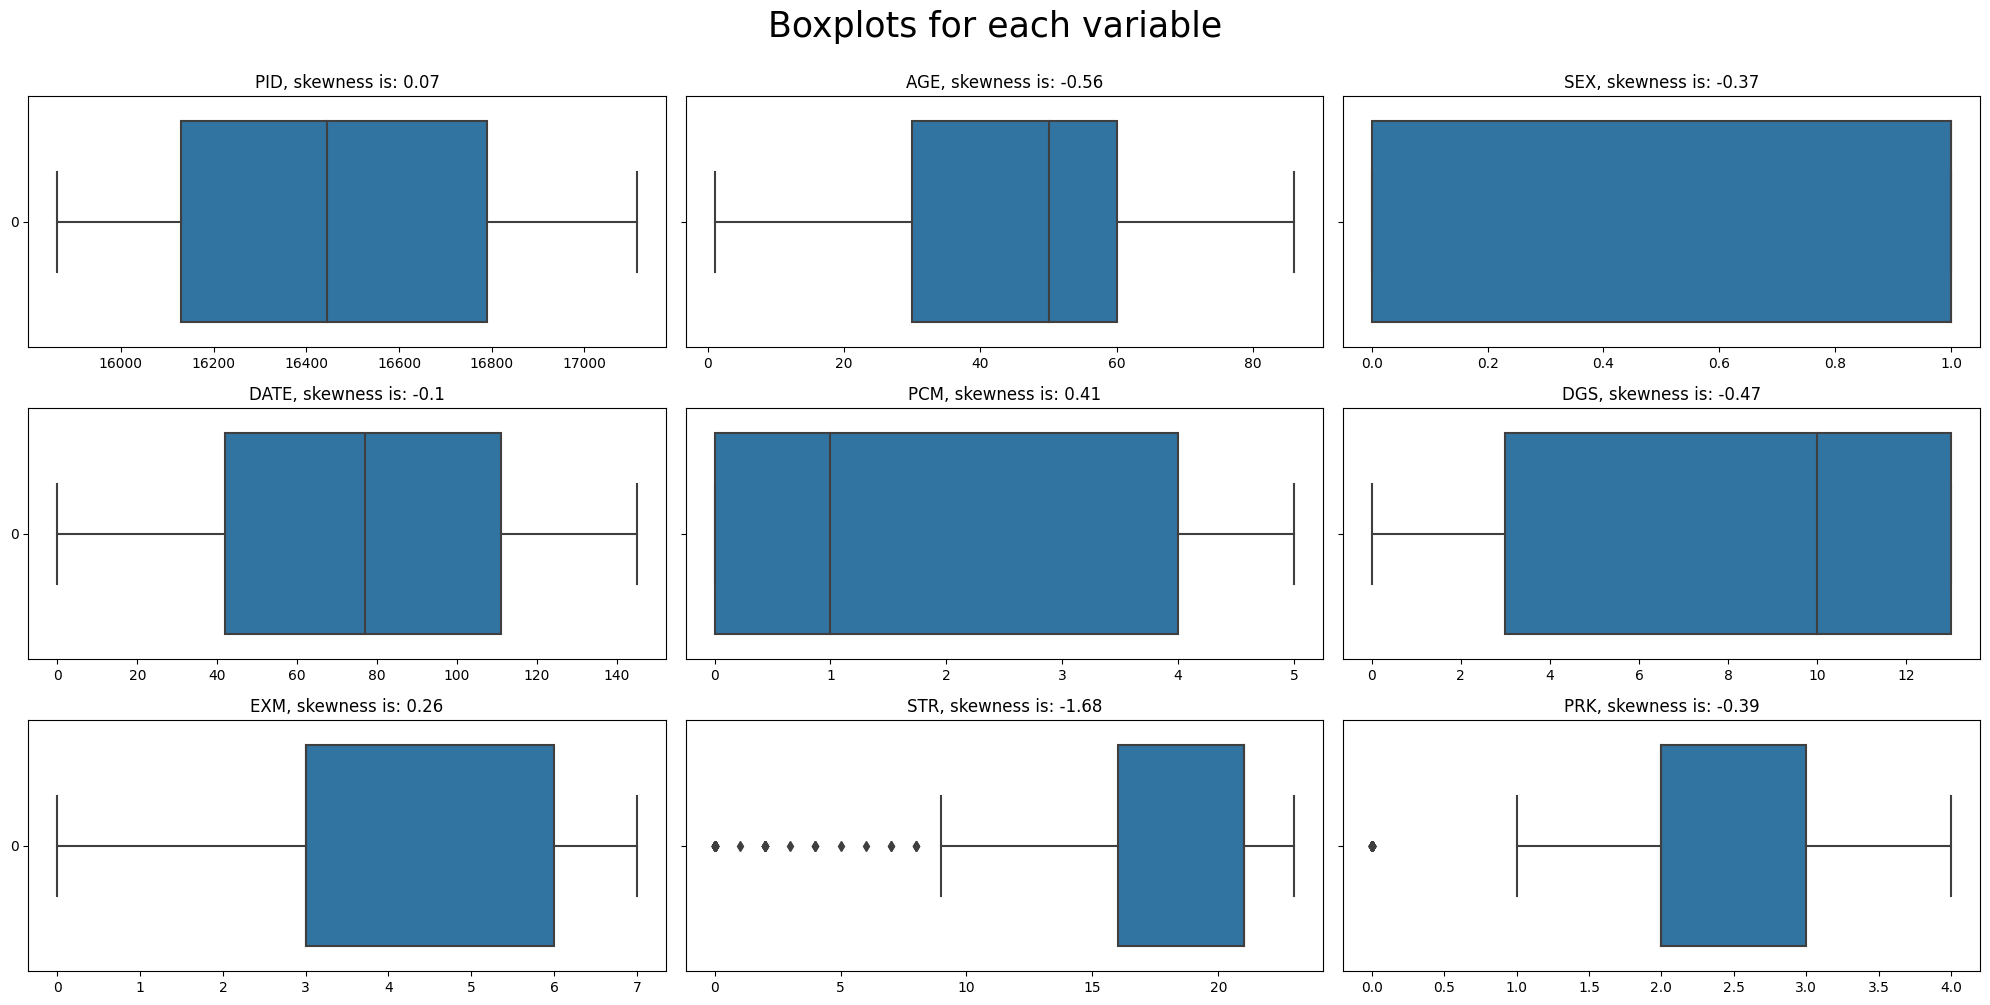

In [ ]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,10))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
boxplots_custom(dataset=ed, columns_list=columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

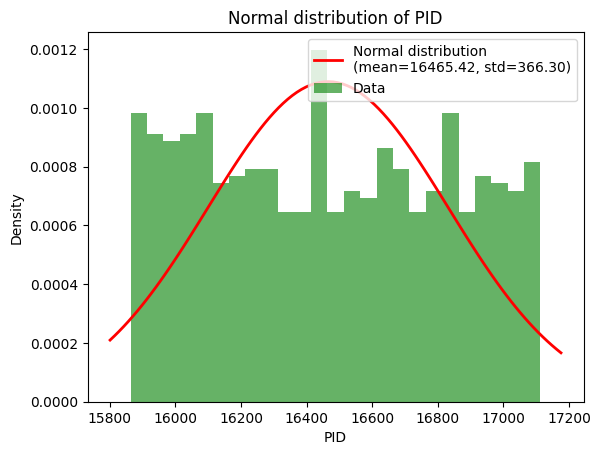

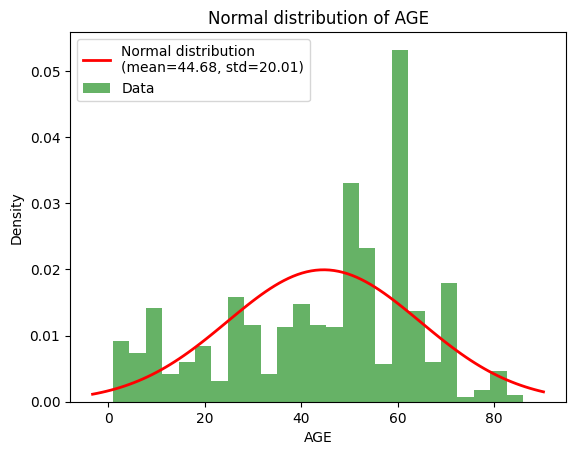

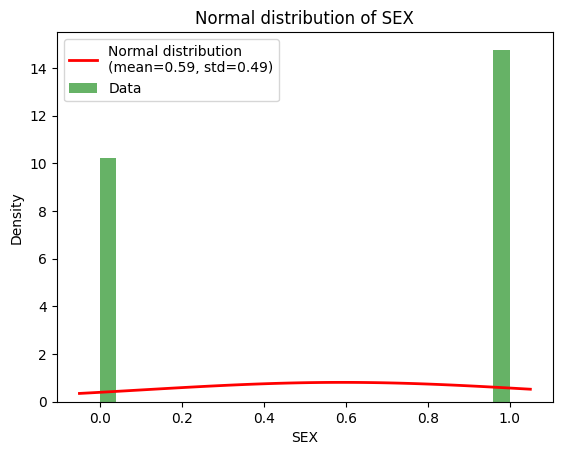

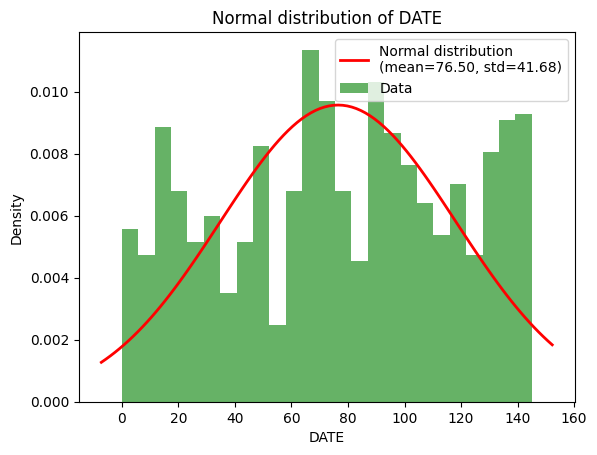

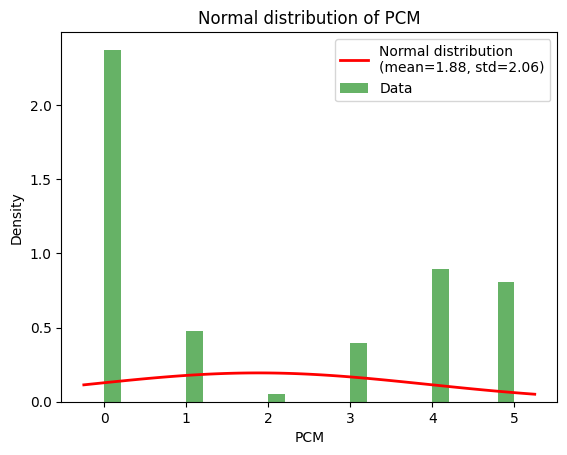

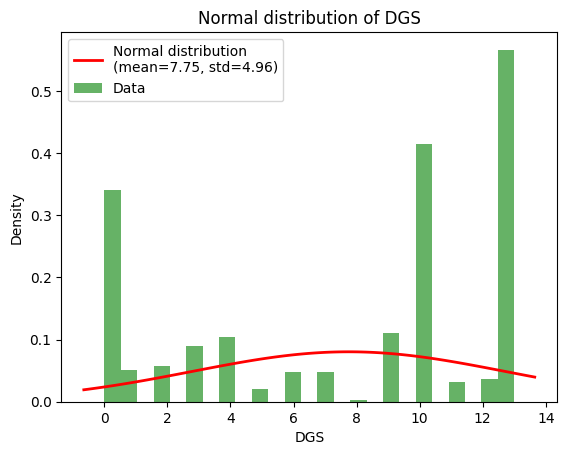

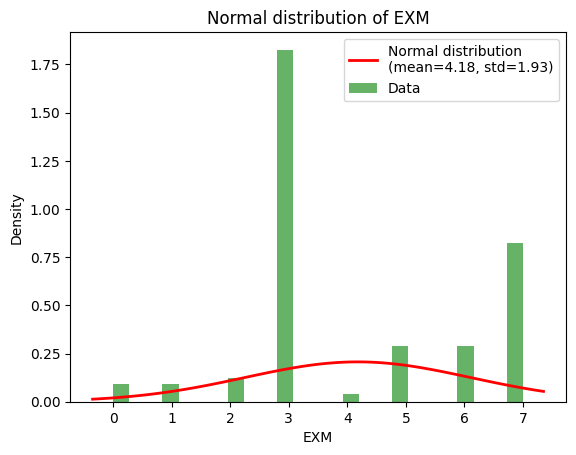

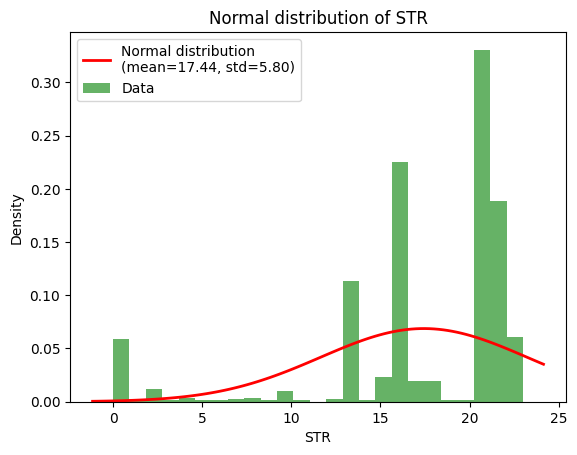

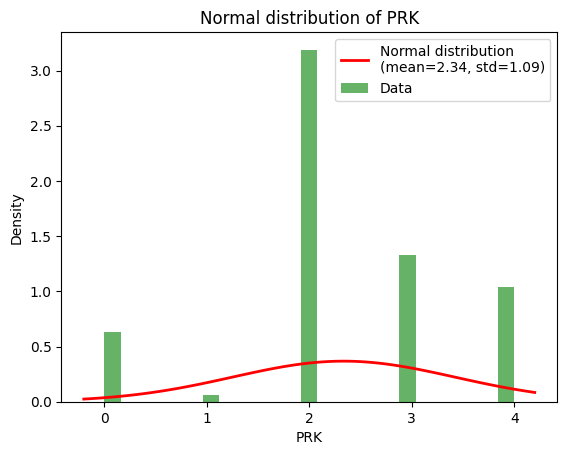

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
columns=['PID','AGE','SEX','DATE','PCM','DGS','EXM','STR','PRK']
for column in columns:
    mu, std = norm.fit(ed[column])
    plt.hist(ed[column], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mu, std)
    plt.plot(x, y, 'r', linewidth=2)
    plt.legend([f'Normal distribution\n(mean={mu:.2f}, std={std:.2f})', 'Data'])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Normal distribution of {column}')
    plt.show()


In [ ]:
from scipy.stats import shapiro
columns = ['STR','PRK']
for col in columns:
  stat, p = shapiro(ed)
  alpha = 0.05
  if p > alpha:
    print("The data is normally distributed")
  else:
    print("The data is not normally distributed")


The data is not normally distributed
The data is not normally distributed


In [ ]:
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col][z_scores > threshold] = np.nan
    df.dropna(inplace=True)
columns=['STR','PRK']
remove_outliers_zscore(ed, columns)


In [ ]:
ed.shape

(790, 10)

In [ ]:
ed.isnull().sum()

PID     0
AGE     0
SEX     0
DATE    0
PCM     0
DGS     0
EXM     0
STR     0
PRK     0
LB      0
dtype: int64

#**DATA PREDICTION**

# **STAGE-1**

In [ ]:
X=ed.iloc[:,[1,2,4,5,6,8]]
y=ed.iloc[:,9]

In [ ]:
Xdf=pd.DataFrame(X)
print(Xdf.shape)
Xdf.head()

(790, 6)


,AGE,SEX,PCM,DGS,EXM,PRK
0,46,1,5,10,3,3
1,46,1,5,10,3,2
2,42,0,5,13,3,3
3,42,0,5,13,3,2
4,9,1,5,10,3,3


In [ ]:
y.shape

(790,)

In [ ]:
ydf=pd.DataFrame(y)
ydf.head(5)

,LB
0,0
1,0
2,0
3,0
4,0


## **MACHINE LEARNING ALGORITHMS**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models=[]
models.append(('NB',GaussianNB()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(8,7,6),verbose=False,learning_rate_init=0.01,learning_rate='constant',activation='tanh',max_iter=300,solver='adam', alpha=0.0001)))
models.append(('DT',DecisionTreeClassifier(criterion='entropy',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=27,random_state=7,max_depth=6)))
models.append(('SVM',SVC(kernel='linear',decision_function_shape='ovr',C=0.001,gamma=15)))

## **BASELINE IMPLEMENTATION**

**10(k)-fold**

In [ ]:
import time
accuracy=dict()
tt=dict()

from sklearn.model_selection import cross_val_score,KFold
for name,model in models:
    kfold=KFold(n_splits=10)

    st=time.time()
    acc=cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    et=time.time()
    accuracy[name]=(acc.mean())
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)



ACCURACY:
NB 0.9050632911392406
MLP 0.930379746835443
DT 0.930379746835443
RF 0.9835443037974685
SVM 0.8658227848101265

TIME:
NB 0.03876781463623047
MLP 3.8712079524993896
DT 0.035395145416259766
RF 0.44231367111206055
SVM 0.09107422828674316


**VARIANCE AND STANDARD DEVIATION**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

num_folds = 10

kf = KFold(n_splits=num_folds, shuffle=True)
variances = dict()
std_devs = dict()

for name, model in models:
    fold_variances = []
    fold_std_devs = []

    for fold_num, (train_indices, test_indices) in enumerate(kf.split(X,y)):
        model.fit(X.iloc[train_indices], y.iloc[train_indices])
        y_pred = model.predict(X.iloc[test_indices])
        mse = mean_squared_error(y.iloc[test_indices], y_pred)
        variance = np.var(y.iloc[test_indices] - y_pred)
        std_dev = np.sqrt(mse)

        fold_variances.append(variance)
        fold_std_devs.append(std_dev)
  
    variances[name] = (np.mean(fold_variances))/10
    std_devs[name] = (np.mean(fold_std_devs))/10


print("\nVariance:")
for key, value in variances.items():
    print(key, value)

print("\nStandard Deviation:")
for key, value in std_devs.items():
    print(key, value)



Variance:
NB 0.008290338086845057
MLP 0.005790738663675693
DT 0.006428456978048389
RF 0.0012530043262297707
SVM 0.011530203493029963

Standard Deviation:
NB 0.029671149654116557
MLP 0.023597094355293197
DT 0.02608221791722653
RF 0.008506202246865885
SVM 0.03638102054624597


**50-50**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

accuracy=dict()
precision=dict()
recall=dict()
ttfFontProperty=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()

    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.9088607594936708
MLP 0.9291139240506329
DT 0.9367088607594937
RF 0.9772151898734177
SVM 0.8481012658227848

TIME:
NB 0.0030863285064697266
MLP 0.3370981216430664
DT 0.0036475658416748047
RF 0.041872262954711914
SVM 0.0056972503662109375


**60-40**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

accuracy=dict()
tt=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.9145569620253164
MLP 0.9208860759493671
DT 0.9367088607594937
RF 0.9683544303797469
SVM 0.8449367088607594

TIME:
NB 0.005468606948852539
MLP 0.10184478759765625
DT 0.0022377967834472656
RF 0.04037737846374512
SVM 0.006241559982299805


**70-30**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

accuracy=dict()
tt=dict()

for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    tt[name]=et-st

print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.8987341772151899
MLP 0.9451476793248945
DT 0.9324894514767933
RF 0.9789029535864979
SVM 0.8312236286919831

TIME:
NB 0.0073969364166259766
MLP 0.3581516742706299
DT 0.002240419387817383
RF 0.04094409942626953
SVM 0.0058803558349609375


**80-20**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

accuracy=dict()
precision=dict()
recall=dict()
f1score=dict()
roc=dict()
tt=dict()
for name,model in models:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    accuracy[name]=metrics.accuracy_score(y_test, y_pred)
    precision[name]=metrics.precision_score(y_test, y_pred,average='micro')
    f1score[name]=metrics.f1_score(y_test,y_pred)
    recall[name]=metrics.recall_score(y_test, y_pred,average='micro')
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc[name]=auc(fpr, tpr)
    tt[name]=et-st
    
print("ACCURACY:")
for key,value in accuracy.items():
    print(key,value)

print("\nPRECISION:")
for key,value in precision.items():
    print(key,value)

print("\nRECALL:")
for key,value in recall.items():
    print(key,value)

print("\nF1 SCORE:")
for key,value in f1score.items():
    print(key,value)


print("\nROC:")
for key,value in roc.items():
    print(key,value)

print("\nTIME:")
for key,value in tt.items():
    print(key,value)

ACCURACY:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

PRECISION:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

RECALL:
NB 0.930379746835443
MLP 0.9493670886075949
DT 0.9430379746835443
RF 0.9746835443037974
SVM 0.8734177215189873

F1 SCORE:
NB 0.717948717948718
MLP 0.8333333333333333
DT 0.7804878048780487
RF 0.92
SVM 0.33333333333333337

ROC:
NB 0.78
MLP 0.8887218045112784
DT 0.8200000000000001
RF 0.9524812030075187
SVM 0.6

TIME:
NB 0.0042476654052734375
MLP 0.17189812660217285
DT 0.0024874210357666016
RF 0.04233908653259277
SVM 0.0064945220947265625


##**VOTING IMPLEMENTATION**

In [ ]:
from sklearn.ensemble import VotingClassifier
nb1 = GaussianNB()
nb2 = GaussianNB()
nb3 = GaussianNB()

voting_clfnb = VotingClassifier(estimators=[('naivebayes1', nb1), ('naivebayes2', nb2),('naivebayes3', nb3)], voting='hard')

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=(8,7),random_state=7,verbose=False,max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(9,8),random_state=7,verbose=False,max_iter=500)

voting_clfmlp = VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='soft')

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

voting_clfdt = VotingClassifier(estimators=[('clf1', clf1), ('clf3', clf3)], voting='soft')

In [ ]:
rfc1 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=42)
rfc2 = RandomForestClassifier(n_estimators=10, max_depth=8, random_state=42)
rfc3 = RandomForestClassifier(n_estimators=15, max_depth=6, random_state=42)

voting_clfrf = VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')

In [ ]:
svm1 = SVC(kernel='sigmoid', decision_function_shape='ovr')
svm2 = SVC(kernel='rbf',decision_function_shape='ovr')
svm3 = SVC(kernel='poly',decision_function_shape='ovr')

voting_clfsvm = VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')

In [ ]:
votingmodel=[]
votingmodel.append(('MLP',VotingClassifier(estimators=[('multilp1', mlp1), ('multilp2', mlp2)], voting='hard')))
votingmodel.append(('DT',VotingClassifier(estimators=[('clf1', clf1), ('clf3', clf3)], voting='hard')))
votingmodel.append(('RF',VotingClassifier(estimators=[('rf1', rfc1), ('rf2', rfc2), ('rf3', rfc3)], voting='hard')))
votingmodel.append(('SVC',VotingClassifier(estimators=[('svm1', svm1), ('svm2', svm2), ('svm3', svm3)], voting='hard')))

 **10(k)-fold**

In [ ]:
from sklearn.datasets import make_classification
def votingclffold(voting_clf):
  X, y = make_classification(n_samples=1024, n_features=14, random_state=7) 
  kfold = KFold(n_splits=10, shuffle=True, random_state=7) 
  scores = cross_val_score(voting_clf, X, y, cv=kfold)
  accuracy=scores.mean()
  return accuracy

print("Voting(10-fold)- NB ",votingclffold(voting_clfnb))
print("Voting(10-fold)- MLP ",votingclffold(voting_clfmlp))
print("Voting(10-fold)- DT ",votingclffold(voting_clfdt))
print("Voting(10-fold)- RF ",votingclffold(voting_clfrf))
print("Voting(10-fold)- SVC ",votingclffold(voting_clfsvm))

Voting(10-fold)- NB  0.8955549209975253
Voting(10-fold)- MLP  0.916990291262136
Voting(10-fold)- DT  0.9092137826004189
Voting(10-fold)- RF  0.9209594517418619
Voting(10-fold)- SVC  0.9101751380163717


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(395, 6)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()
nb2 = GaussianNB()
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:100], y_train[:100])
nb2.fit(X_train_df.iloc[100:230], y_train[100:230])
nb3.fit(X_train_df.iloc[230:395], y_train[230:395])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(50-50)- NB ",(accuracy))


Voting(50-50)- NB  0.9088607594936708


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

def votingclf_fiftysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(50-50)- ",estimator[0],votingclf_fiftysplit(estimator[1]))

Voting(50-50)-  MLP 0.9189873417721519
Voting(50-50)-  DT 0.9367088607594937
Voting(50-50)-  RF 0.979746835443038
Voting(50-50)-  SVC 0.8481012658227848


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(474, 6)

In [ ]:
nb1 = GaussianNB()
nb2 = GaussianNB()
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:150], y_train[:150])
nb2.fit(X_train_df.iloc[150:300], y_train[150:300])
nb3.fit(X_train_df.iloc[300:474], y_train[300:474])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(X_train_df, y_train)
accuracy = ensemble.score(x_test, y_test)
print("Voting(60-40)- NB",(accuracy))


Voting(60-40)- NB 0.9145569620253164


In [ ]:
def votingclf_sixtysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(60-40)- ",estimator[0],votingclf_sixtysplit(estimator[1]))

Voting(60-40)-  MLP 0.9240506329113924
Voting(60-40)-  DT 0.9367088607594937
Voting(60-40)-  RF 0.9683544303797469
Voting(60-40)-  SVC 0.8449367088607594


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(553, 6)

In [ ]:
nb1 = GaussianNB()
nb2 = GaussianNB()
X_train_df = pd.DataFrame(x_train)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:200], y_train[:200])
nb2.fit(X_train_df.iloc[200:350], y_train[200:350])
nb3.fit(X_train_df.iloc[350:553], y_train[350:553])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Voting(70-30)- NB ",(accuracy))


Voting(70-30)- NB  0.9029535864978903


In [ ]:
def votingclf_seventysplit(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

for estimator in votingmodel:
  print("Voting(70-30)- ",estimator[0],votingclf_seventysplit(estimator[1]))

Voting(70-30)-  MLP 0.9113924050632911
Voting(70-30)-  DT 0.9282700421940928
Voting(70-30)-  RF 0.9746835443037974
Voting(70-30)-  SVC 0.8354430379746836


**80-20**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
traindf=pd.DataFrame(x_train)
traindf.shape

(632, 6)

In [ ]:
traindf.shape

(632, 6)

In [ ]:
from sklearn.metrics import roc_curve, auc
nb1 = MultinomialNB()
nb2 = GaussianNB()
nb3 = GaussianNB()
X_train_df = pd.DataFrame(x_train)
print(X_train_df.shape)
X_test_df = pd.DataFrame(x_test)
nb1.fit(X_train_df.iloc[:200], y_train[:200])
nb2.fit(X_train_df.iloc[200:450], y_train[200:450])
nb3.fit(X_train_df.iloc[450:632], y_train[450:632])
ensemble = VotingClassifier(estimators=[('nb1', nb1), ('nb2', nb2),('nb3',nb3)], voting='hard')
ensemble.fit(x_train, y_train)
accuracy = ensemble.score(x_test, y_test)
y_pred = ensemble.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred)
rocc=auc(fpr, tpr)
print("Voting(70-30)- NB Accuracy ",(accuracy))
print("Voting(70-30)- NB Precision",(metrics.precision_score(y_test, y_pred,average='micro')))
print("Voting(70-30)- NB Fi Score",(metrics.f1_score(y_test, y_pred)))
print("Voting(70-30)- NB Recall",(metrics.recall_score(y_test, y_pred,average='weighted')))
print("Voting(70-30)- NB ROC",(rocc))


(632, 6)
Voting(70-30)- NB Accuracy  0.8924050632911392
Voting(70-30)- NB Precision 0.8924050632911392
Voting(70-30)- NB Fi Score 0.5641025641025641
Voting(70-30)- NB Recall 0.8924050632911392
Voting(70-30)- NB ROC 0.6964285714285714


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def votingclf_eightysplit_acc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy
print("\nACCURACY")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_acc(estimator[1]))

def votingclf_eightysplit_pre(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  precision = metrics.precision_score(y_test, y_pred)
  return precision
print("\nPRECISION")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_pre(estimator[1]))

def votingclf_eightysplit_f1(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  f1 = metrics.f1_score(y_test, y_pred)
  return f1
print("\nF1 SCORE")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_f1(estimator[1]))

def votingclf_eightysplit_rec(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  recall = metrics.recall_score(y_test, y_pred)
  return recall
print("\nRECALL")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_rec(estimator[1]))


def votingclf_eightysplit_roc(voting_clf):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
  voting_clf.fit(x_train, y_train)
  y_pred = voting_clf.predict(x_test)
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  rocc=auc(fpr, tpr)
  return rocc
print("\nROC")
for estimator in votingmodel:
  print("Voting(80-20)- ",estimator[0],votingclf_eightysplit_roc(estimator[1]))


ACCURACY
Voting(80-20)-  MLP 0.9240506329113924
Voting(80-20)-  DT 0.9240506329113924
Voting(80-20)-  RF 0.9746835443037974
Voting(80-20)-  SVC 0.8354430379746836

PRECISION
Voting(80-20)-  MLP 1.0
Voting(80-20)-  DT 1.0
Voting(80-20)-  RF 1.0
Voting(80-20)-  SVC 1.0

F1 SCORE
Voting(80-20)-  MLP 0.7391304347826086
Voting(80-20)-  DT 0.7391304347826086
Voting(80-20)-  RF 0.9259259259259259
Voting(80-20)-  SVC 0.1875

RECALL
Voting(80-20)-  MLP 0.5862068965517241
Voting(80-20)-  DT 0.5862068965517241
Voting(80-20)-  RF 0.8620689655172413
Voting(80-20)-  SVC 0.10344827586206896

ROC
Voting(80-20)-  MLP 0.7931034482758621
Voting(80-20)-  DT 0.7931034482758621
Voting(80-20)-  RF 0.9310344827586207
Voting(80-20)-  SVC 0.5517241379310345


## **BAGGING IMPLEMENTATION**

**10(k)-fold**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
models=[]
models.append(('NB', GaussianNB()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes=(8,8,5),verbose=False,learning_rate_init=0.01,learning_rate='constant',activation='tanh',max_iter=300,solver='adam', alpha=0.0001)))
models.append(('DT',DecisionTreeClassifier(criterion='gini',max_depth=2)))
models.append(('RF',RandomForestClassifier(n_estimators=27,random_state=11,max_depth=7)))
models.append(('SVM',SVC(kernel='rbf',decision_function_shape='ovr',C=0.001,gamma=20)))

In [ ]:
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    kf = KFold(n_splits=10, shuffle=True)
    all_predictions = []
    for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      bagging_clf.fit(X_train, y_train)
      predictions = bagging_clf.predict(X_test)
      all_predictions.append(metrics.accuracy_score(y_test,predictions))
    final_predictions = np.mean(all_predictions, axis=0)
    print("Bagging(10-fold)- ",estimator[0], final_predictions)

Bagging(10-fold)-  NB 0.9050632911392406
Bagging(10-fold)-  MLP 0.9139240506329113
Bagging(10-fold)-  DT 0.930379746835443
Bagging(10-fold)-  RF 0.9620253164556962
Bagging(10-fold)-  SVM 0.8405063291139241


**50-50**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(50-50)- ",estimator[0], accuracy)


ACCURACY
Bagging(50-50)-  NB 0.9088607594936708
Bagging(50-50)-  MLP 0.9215189873417722
Bagging(50-50)-  DT 0.9392405063291139
Bagging(50-50)-  RF 0.9544303797468354
Bagging(50-50)-  SVM 0.8430379746835444


**60-40**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(60-40)- ",estimator[0], accuracy)

ACCURACY
Bagging(60-40)-  NB 0.8987341772151899
Bagging(60-40)-  MLP 0.9113924050632911
Bagging(60-40)-  DT 0.939873417721519
Bagging(60-40)-  RF 0.9683544303797469
Bagging(60-40)-  SVM 0.8481012658227848


**70-30**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(70-30)- ",estimator[0], accuracy)

ACCURACY
Bagging(70-30)-  NB 0.9029535864978903
Bagging(70-30)-  MLP 0.9029535864978903
Bagging(70-30)-  DT 0.9324894514767933
Bagging(70-30)-  RF 0.9409282700421941
Bagging(70-30)-  SVM 0.8312236286919831


**80-20**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
print("ACCURACY")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Bagging(80-20)- ",estimator[0], accuracy)

print("\nPRECISION")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], precision)

print("\nF1 SCORE")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    f1score = metrics.f1_score(y_test,y_pred)
    print("Bagging(80-20)- ",estimator[0], f1score)
  
print("\nRECALL")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    recall = metrics.recall_score(y_test, y_pred,average='micro')
    print("Bagging(80-20)- ",estimator[0], recall)

print("\nROC")
for estimator in models:
    bagging_clf = BaggingClassifier(base_estimator=estimator[1],n_estimators=15,max_features=6,max_samples=100,bootstrap=True, random_state=42)
    bagging_clf.fit(x_train, y_train)
    y_pred = bagging_clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    rocc=auc(fpr, tpr)
    print("Bagging(80-20)- ",estimator[0], rocc)

ACCURACY
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.8164556962025317

PRECISION
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.8164556962025317

F1 SCORE
Bagging(80-20)-  NB 0.6818181818181819
Bagging(80-20)-  MLP 0.6363636363636364
Bagging(80-20)-  DT 0.7391304347826086
Bagging(80-20)-  RF 0.7916666666666666
Bagging(80-20)-  SVM 0.0

RECALL
Bagging(80-20)-  NB 0.9113924050632911
Bagging(80-20)-  MLP 0.8987341772151899
Bagging(80-20)-  DT 0.9240506329113924
Bagging(80-20)-  RF 0.9367088607594937
Bagging(80-20)-  SVM 0.8164556962025317

ROC
Bagging(80-20)-  NB 0.7586206896551724
Bagging(80-20)-  MLP 0.7375033413525796
Bagging(80-20)-  DT 0.7931034482758621
Bagging(80-20)-  RF 0.8275862068965517
Bagging(80-20)-  SVM 0.5
